In [168]:
import pandas as pd

campaign = pd.read_csv('../Parker-Work/bankdata.csv')
campaign = campaign.dropna()
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# make the target and features
campaign['job_n'], _ = campaign['job'].factorize()
campaign['education_n'], _ = campaign['education'].factorize()
campaign['marital_n'], _ = campaign['marital'].factorize()
#campaign.head()
X = campaign[['age','nr.employed','euribor3m','campaign','cons.conf.idx']]
y = campaign['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [170]:
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [171]:
from sklearn.metrics import accuracy_score
y_pred = neigh.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8880496358241166


In [172]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[6381  147]
 [ 683  203]]


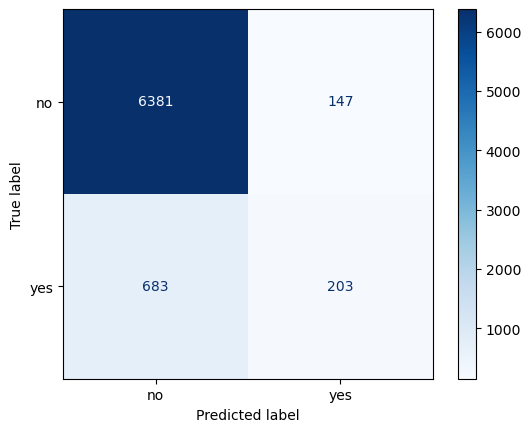

In [173]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
  neigh,
  X_test,
  y_test,
  cmap=plt.cm.Blues,
)

In [174]:
    
true_positives = matrix[1][1]
false_positives = matrix[0][1]
false_negative = matrix[1][0]

print (true_positives, false_negative, false_positives)

prec = (true_positives / (true_positives + false_positives))
recal = (true_positives / (true_positives + false_negative))

print (recal, prec, acc)

203 683 147
0.2291196388261851 0.58 0.8880496358241166


In [175]:
n3 = [0.304, 0.479, 0.877]
n4 = [0.173, 0.575, 0.886]
n5 = [0.262, 0.513, 0.882]
n6 = [0.174, 0.544, 0.884]
n7 = [0.174, 0.544, 0.883]
n8 = [0.181, 0.570, 0.886]
n9 = [0.245, 0.562, 0.887]
n10 = [0.181, 0.582, 0.887]
n11 = [0.240, 0.576, 0.889]
n12 = [0.172, 0.582, 0.886]
n13 = [0.231, 0.569, 0.887]
n14 = [0.191, 0.601, 0.888]
n15 = [0.229, 0.580, 0.888]